# Task1-Prediction using Supervised ML

intern name : Sankalp Jain

1.Problem statement-Predicting percentage of student by the number of hours of studying.So,what will be predicted score if a student studies for 9.25 hrs/ day?

2.Data-'https://bit.ly/w-data'

3.Features-attribute-"Hours",label-"Scores"


In [8]:
#importng required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [9]:
url = 'https://bit.ly/w-data'
Students = pd.read_csv(url)
print("Data imported successfully")

Students.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
len(Students)

25

In [11]:
Students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
Students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
Students.isnull().sum()

Hours     0
Scores    0
dtype: int64

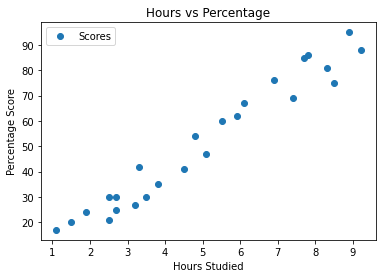

In [14]:


Students.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

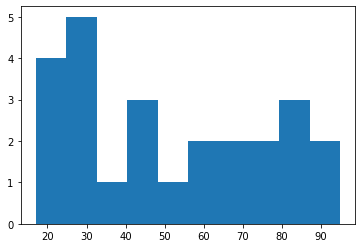

In [15]:
plt.hist(Students.Scores)

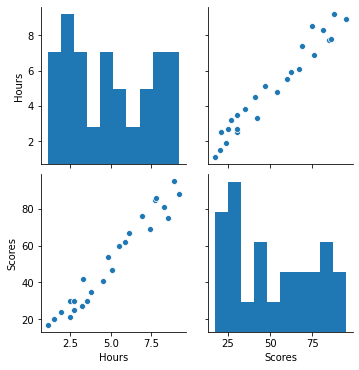

In [16]:
sn.pairplot(Students)

In [17]:

Students.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [18]:
X=Students["Hours"]
X

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [19]:
Y=Students["Scores"]
Y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [20]:
X=X.values.reshape(-1,1)
X.shape

(25, 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(20, 5, 20, 5)

In [23]:
#X-attribute(input),y-label(output)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train,Y_train)

LinearRegression()

In [30]:
print(X_test) 
Y_pred = reg.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


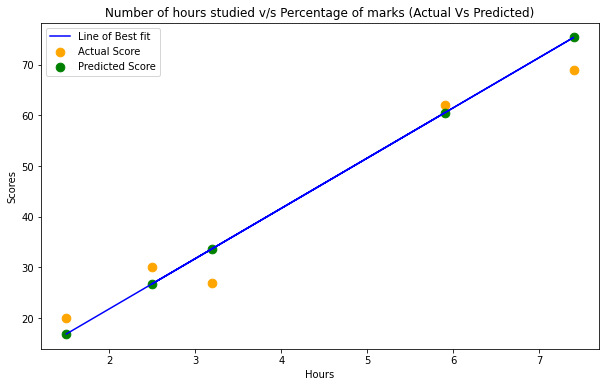

In [31]:
#visualization
plt.figure(figsize=(10,6))
plt.scatter(X_test,Y_test,color='orange',s=75,label='Actual Score')
plt.scatter(X_test,Y_pred,color='green',s=75,label='Predicted Score')
plt.plot(X_test,Y_pred,color='blue',label='Line of Best fit')
plt.title('Number of hours studied v/s Percentage of marks (Actual Vs Predicted)')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.legend()
plt.show()

In [32]:
error=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred,'Absolute Error': abs(Y_test-Y_pred)})
error

,Actual,Predicted,Absolute Error
5,20,16.884145,3.115855
2,27,33.732261,6.732261
19,69,75.357018,6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


In [33]:
#finding the Root Mean Squared Error(RMSE) & R-squared value.
from sklearn.metrics import r2_score,mean_squared_error

In [34]:
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE = ",rmse)

RMSE =  4.6474476121003665


In [36]:
r2=r2_score(Y_test,Y_pred)
print("The regressor score is ", r2)

The regressor score is  0.9454906892105356


In [37]:
test_Hours=np.array([9.25]).reshape(-1,1)#Creating a numpy array of the test independent variable 'Hours'
pred_Scores=reg.predict(test_Hours)

print('The predicted percentage score of a student studying for 9.25 hours a day is {} %'.format(np.round(pred_Scores[0],2)))

The predicted percentage score of a student studying for 9.25 hours a day is 93.69 %


Here we get predicted score of a student for studying 9.25 hours per day is 93.69%